# Fundamentos de Metodología Estadística



## Bases de datos
1. Para este trabajo vamos a usar los datos de [acá](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download)

2. El Sistema de Vigilancia de Factores de Riesgo del Comportamiento (BRFSS, por sus siglas en inglés) es una encuesta telefónica relacionada con la salud que los CDC recopilan anualmente. Cada año, la encuesta recopila respuestas de más de 400000 estadounidenses sobre comportamientos de riesgo relacionados con la salud, condiciones de salud crónicas y el uso de servicios preventivos. Se lleva a cabo todos los años desde 1984. Para este proyecto, se utilizó un csv del conjunto de datos disponible en Kaggle para el año 2015.
3. El [diabetes_BRFSS2015.csv](https://raw.githubusercontent.com/Cruzalirio/Unal-Enfermeria-/main/Datos/diabetes_BRFSS2015.csv) es un conjunto de datos limpio de 253680 respuestas a la encuesta BRFSS2015 de los CDC. La variable objetivo Diabetes_012 tiene 3 clases. 0 es sin diabetes o solo durante el embarazo, 1 es para prediabetes y 2 es para diabetes. Hay un desequilibrio de clases en este conjunto de datos. Este conjunto de datos tiene 21 variables de características

4. Descripción de las variables:


*   Diabetes_012: 0 = no diabetes, 1 = prediabetes, 2 = diabetes
*   HighBP: 0 = no high BP, 1 = high BP
*   HighChol: 0 = no high cholesterol, 1 = high cholesterol
*   CholCheck: 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years.
*   BMI: Body Mass Index
*   Smoker: Have you smoked at least 100 cigarettes in your entire life?(Note: 5 packs = 100 cigarettes) 0 = no, 1 = yes
*   Stroke:  (Ever told) you had a stroke. 0 = no, 1 = yes
*   HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no, 1 = yes
*   PhysActivity: physical activity in past 30 days - not including job 0 = no, 1 = yes
*   Fruits: Consume Fruit 1 or more times per day 0 = no, 1 = yes
*   Veggies: Consume Vegetables 1 or more times per day 0 = no, 1 = yes
*   HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no, 1 = yes
*   AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes
*  NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes
*   GenHlth: Would you say that in general your health is: scale 1-5. 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor.
*  MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
*   PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
*    DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
*    Sex:  0 = female 1 = male
*    Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
*    Education:  Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
*   Income:  Income scale (INCOME2 see codebook) scale 1-8 1 = less than \$10,000 5 = less than \$35,000 8 = \$75,000 or more


## Vamos con R
Librerias necesarias para cargar, manipular y visualizar tablas de datos:
1. **readxl**: readxl es un paquete diseñado para hacer una sola tarea: importar hojas de Excel a R. Esto hace que sea un paquete ligero y eficiente, a cambio de no contar con funciones avanzadas.  Este paquete funciona en Windows, Linux y OSX.  readxl es compatible con hojas de cálculo de Excel 97-03, con extensión .xls, y con hojas de cálculo de las versiones más recientes de Excel, con extensión, .xlsx. Sin embargo, no es compatible con hojas de cálculo con extensión .ods, común en paquetería de oficina de código libre como LibreOffice.  Si una celda de una pestaña contiene una fórmula, se importa es el resultado de esa fórmula. En general, lo que ves es lo que obtienes al importar una hoja de cálculo con readxl. Si deseas recuperar información contenida en fórmulas, tendrás que buscar otras alternativas. El propósito final de usar readxl es contar con datos ordenados (tidy data), esto es, que cada renglón represente una observación y cada columna representa una variable. Cumplir con estas dos condiciones nos proporciona una estructura ideal para realizar análisis estadísticos

2. [**Tidiverse**](https://www.tidyverse.org/#:~:text=The%20tidyverse%20is%20an%20opinionated,%2C%20grammar%2C%20and%20data%20structures.&text=See%20how%20the%20tidyverse%20makes,%E2%80%9CR%20for%20Data%20Science%E2%80%9D.): Es un ecosistema de trabajo de datos en R. Consta de varias librerias, entre las que se encuentran:
* [**dplyr**](https://dplyr.tidyverse.org/ ): es una gramática de manipulación de datos que proporciona un conjunto consistente de verbos que lo ayudan a resolver los desafíos de manipulación de datos más comunes: 
1. mutate() agrega nuevas variables que son funciones de variables existentes
2. select() elige variables en función de sus nombres.
3. filter() selecciona casos en función de sus valores.
4. summarise() reduce múltiples valores a un solo resumen.
5. arrange() cambia el orden de las filas.
* [**ggplot2**](https://ggplot2.tidyverse.org/): ggplot2 es un sistema para crear gráficos declarativamente, basado en The Grammar of Graphics. Usted proporciona los datos, le dice a ggplot2 cómo asignar variables a la estética, qué primitivas gráficas usar y se ocupa de los detalles.
* [**readr**](https://readr.tidyverse.org/): El objetivo de readr es proporcionar una forma rápida y sencilla de leer datos rectangulares de archivos delimitados, como valores separados por comas (CSV) y valores separados por tabuladores (TSV). Está diseñado para analizar muchos tipos de datos que se encuentran en la naturaleza, al tiempo que proporciona un informe de problemas informativo cuando el análisis conduce a resultados inesperados.


### Primero la instalación de la libreria tidyverse

Luego de instalarla, se llama con el comando 

```
library(tidyverse)
```



In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Carga de datos

1. Descargar el archivo [de acá](https://github.com/Cruzalirio/Unal-Enfermeria-/blob/main/Datos/diabetes_BRFSS2015.csv)

In [ ]:
datos = read_csv("https://raw.githubusercontent.com/Cruzalirio/Unal-Enfermeria-/main/Datos/diabetes_BRFSS2015.csv")
### La función head me permite ver las primeras filas
head(datos)

Rows: 253680 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, He...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1,40,1,0,0,0,0,⋯,1,0,5,18,15,1,0,9,4,3
0,0,0,0,25,1,0,0,1,0,⋯,0,1,3,0,0,0,0,7,6,1
0,1,1,1,28,0,0,0,0,1,⋯,1,1,5,30,30,1,0,9,4,8
0,1,0,1,27,0,0,0,1,1,⋯,1,0,2,0,0,0,0,11,3,6
0,1,1,1,24,0,0,0,1,1,⋯,1,0,2,3,0,0,0,11,5,4
0,1,1,1,25,1,0,0,1,1,⋯,1,0,2,0,2,0,1,10,6,8


### Usaremos dplyr para manipular la base

1. Seleccionar
2. Filtrar
3. Crear
4. Arreglar

In [ ]:
## Seleccionar la variable Diabetes_012
datos %>% select(Diabetes_012) %>% head(n=5)

Diabetes_012
<dbl>
0
0
0
0
0


In [ ]:
# Seleccionar la variable Diabetes_012 y edad
datos %>% select(Diabetes_012, Age) %>% head(n=5)

Diabetes_012,Age
<dbl>,<dbl>
0,9
0,7
0,9
0,11
0,11


In [ ]:
## Filtrar las personas con de sexo femenino

datos %>% filter(Sex==1) %>% head(n=5)

Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1,25,1,0,0,1,1,⋯,1,0,2,0,2,0,1,10,6,8
0,0,0,1,24,0,0,0,0,0,⋯,1,0,2,0,0,0,1,8,4,3
2,0,0,1,25,1,0,0,1,1,⋯,1,0,3,0,0,0,1,13,6,8
2,0,0,1,23,1,0,0,1,0,⋯,1,0,2,0,0,0,1,7,5,6
0,0,1,1,28,0,0,0,0,0,⋯,1,0,2,10,0,0,1,4,6,8


In [ ]:
## Filtrar las personas con de sexo femenino y BMI menor a 14

datos %>% filter(Sex==1, BMI< 14) %>% head(n=5)

Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,1,13,1,0,0,1,0,⋯,1,0,3,0,2,1,1,5,6,3
0,0,0,1,12,0,0,0,1,1,⋯,1,1,3,0,1,0,1,9,2,8
0,1,1,1,13,1,0,0,1,1,⋯,1,0,3,0,0,0,1,10,6,5
0,0,0,1,12,1,0,0,1,0,⋯,1,0,2,15,0,0,1,11,6,7
0,0,0,1,13,0,0,0,1,1,⋯,1,0,2,0,0,0,1,2,6,4


In [ ]:
## Ordenar la base por BMI
## Notar que el menor BMI es de 12

datos %>% arrange(BMI)%>% head(n=5)

Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,1,12,0,0,0,1,1,⋯,1,1,3,0,1,0,1,9,2,8
0,0,0,1,12,1,0,0,1,0,⋯,1,0,2,15,0,0,1,11,6,7
0,0,0,1,12,0,0,0,1,1,⋯,0,0,3,0,0,1,0,13,5,2
0,0,1,1,12,1,0,1,0,0,⋯,1,1,5,30,30,1,0,9,6,2
0,0,0,1,12,1,0,0,1,1,⋯,1,0,2,8,0,0,1,6,6,8


In [ ]:
## Ordenar por BMI y luego por ingreso

datos %>% arrange(BMI, Income) %>% head(n=5)

Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,1,12,0,0,0,1,1,⋯,0,0,3,0,0,1,0,13,5,2
0,0,1,1,12,1,0,1,0,0,⋯,1,1,5,30,30,1,0,9,6,2
0,0,0,1,12,0,0,0,0,0,⋯,1,0,2,0,0,1,0,7,4,3
0,0,0,1,12,1,0,0,1,0,⋯,1,0,2,15,0,0,1,11,6,7
0,0,0,1,12,0,0,0,1,1,⋯,1,1,3,0,1,0,1,9,2,8


In [ ]:
### Sobre toda una variable

datos %>% mutate(ComeVegetales = ifelse(Veggies==0, "No come vegetales", "Sí come vegetales")) %>% head(n=5)

Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ComeVegetales
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,1,1,1,40,1,0,0,0,0,⋯,0,5,18,15,1,0,9,4,3,Sí come vegetales
0,0,0,0,25,1,0,0,1,0,⋯,1,3,0,0,0,0,7,6,1,No come vegetales
0,1,1,1,28,0,0,0,0,1,⋯,1,5,30,30,1,0,9,4,8,No come vegetales
0,1,0,1,27,0,0,0,1,1,⋯,0,2,0,0,0,0,11,3,6,Sí come vegetales
0,1,1,1,24,0,0,0,1,1,⋯,0,2,3,0,0,0,11,5,4,Sí come vegetales


Las anteriores operaciones solo muestran el resultado, pero no se guardan en el espacio de trabajo de R. Para guardarlas, se debe crear un objeto a su nombre.

In [ ]:
datosVege = datos %>% mutate(ComeVegetales = ifelse(Veggies==0, "No come vegetales", "Sí come vegetales"))

Tambien se pueden hacer operaciones sucesivas sobre la base de datos con el operados %>%. POr ejemplo si queremos crear un conjunto de datos, llamado DiabetesMujeres que contenga las siguientes variables:

1. Sobrepeso = Sí: Si el BMI es mayor a 26, y NO en otro caso.
2. FactorRiesgo = Suma de las variables HighChol, Smoker, Stroke, HvyAlcoholConsump
3. Comida = Suma de las variables frutas y vegetales
4. Qué solo esten las mujeres con diabetes.

Se procedería de la siguiente forma.

In [ ]:
DiabetesMujeres = datos %>% mutate(Sobrepeso = ifelse(BMI>26, "Sí", "No"),
                                   FactorRiesgo =HighChol+ Smoker +  Stroke + HvyAlcoholConsump,
                                   Comida = Fruits + Veggies ) %>%
                            filter(Sex==0, Diabetes_012 == 2) %>%
                            select(Sobrepeso, FactorRiesgo, Comida)

### Practica de R

1. Seleccionar una base con las personas que tiene bajo peso, que no coman verduras y fumen.

2. Construir una nueva variable que sume todas las variables asociadas a enfermedades previas.

3. Exportar esta base de datos en formato Excel. Una guía se puede encontrar [acá](https://r-coder.com/exportar-datos-r/)



## Estadistica Descriptiva

Tomado de [acá](https://economipedia.com/definiciones/estadistica-descriptiva.html)

1. La estadística descriptiva trata de describir algo. Pero no describirlo de cualquiera forma, sino de manera cuantitativa. Pensemos en el peso de una caja de verduras, en la altura de una persona o en la cantidad de dinero que gana una empresa. De estas variables podríamos decir muchas cosas. Por ejemplo, podríamos indicar que esta o aquella caja de tomates pesan mucho o pesan menos que otras. Siguiendo con otro ejemplo, podríamos decir que el ingreso de una empresa varía mucho a lo largo del tiempo o que una persona tiene una altura promedio.

2. Para dictar las afirmaciones anteriores, sobre mucho, poco, alto, bajo, muy variable o poco variable necesitamos variables de medidas. Esto es, necesitamos cuantificarlas, ofrecer un número. Con esto en mente, podríamos utilizar los gramos o los kilogramos como unidad de medida para saber el peso de tantas cajas de tomates como consideremos. Una vez pesemos treinta cajas, sabremos cuales pesan más, cuales pesan menos, que cuantía es la que más se repite o si existe mucha disparidad entre los pesos de las diferentes cajas.

3. Con esta idea nace la estadística descriptiva, con la de recoger datos, almacenarlos, realizar tablas o incluso gráficos que nos ofrezcan información sobre un determinado asunto. Adicionalmente, nos ofrecen medidas que resumen la información de una gran cantidad de datos.

## Tablas de frecuencias

1. La tabla de frecuencias es una tabla donde los datos estadísticos aparecen bien organizados, distribuidos según su frecuencia, es decir, según las veces que se repite en la muestra.  En esta tabla se representan los diferentes tipos de frecuencias, ordenados en columnas.  La tabla de frecuencias es una herramienta que permite la realización de las gráficas o diagramas estadísticos de una forma más fácil.
2.  La frecuencia absoluta es el número de veces que un dato se repite dentro de un conjunto de datos. Se representa como  donde la  corresponde al número de dato.
3. La frecuencia relativa de un dato es el número que se repite ese dato en relación al número total de datos, o en otras palabras, es la proporción de veces que aparece ese dato con respecto al total.
4. La frecuencia absoluta acumulada es la suma de las frecuencias absolutas que se va acumulando hasta ese dato, es decir, la frecuencia absoluta acumulada de un dato en concreto se obtiene sumando su frecuencia absoluta a las frecuencias absolutas de los datos que son menores que él. **Solo tiene sentido si la variable es ordinal o discreta**
5. La frecuencia relativa acumulada es el mismo concepto que para la frecuencia absoluta acumulada. **Solo tiene sentido si la variable es ordinal o discreta**

## Tabla de frecuencias

In [ ]:
## Frecuencias absolutas
datos %>% group_by(Diabetes_012) %>% summarise(Conteo=n())

Diabetes_012,Conteo
<dbl>,<int>
0,213703
1,4631
2,35346


In [ ]:
tablaDiabetes = datos %>% group_by(Diabetes_012) %>% summarise(Conteo=n())
tablaDiabetes

Diabetes_012,Conteo
<dbl>,<int>
0,213703
1,4631
2,35346


In [ ]:
### Le pegamos las otras frecuencias

tablaDiabetes = tablaDiabetes %>% mutate(Absoluta = Conteo, Relativa = Conteo/sum(Conteo))

tablaDiabetes

Diabetes_012,Conteo,Absoluta,Relativa
<dbl>,<int>,<int>,<dbl>
0,213703,213703,0.84241170
1,4631,4631,0.01825528
2,35346,35346,0.13933302


## Gráfica de barras

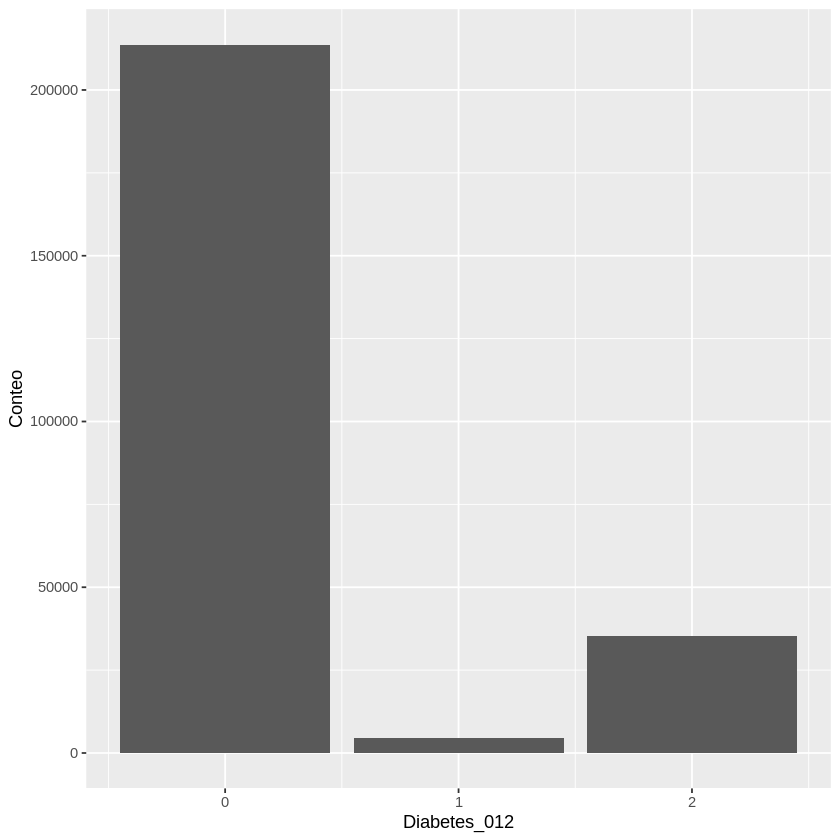

In [ ]:
grafica = ggplot(tablaDiabetes, aes(x=Diabetes_012, y=Conteo))+
  geom_bar(stat="identity")
grafica

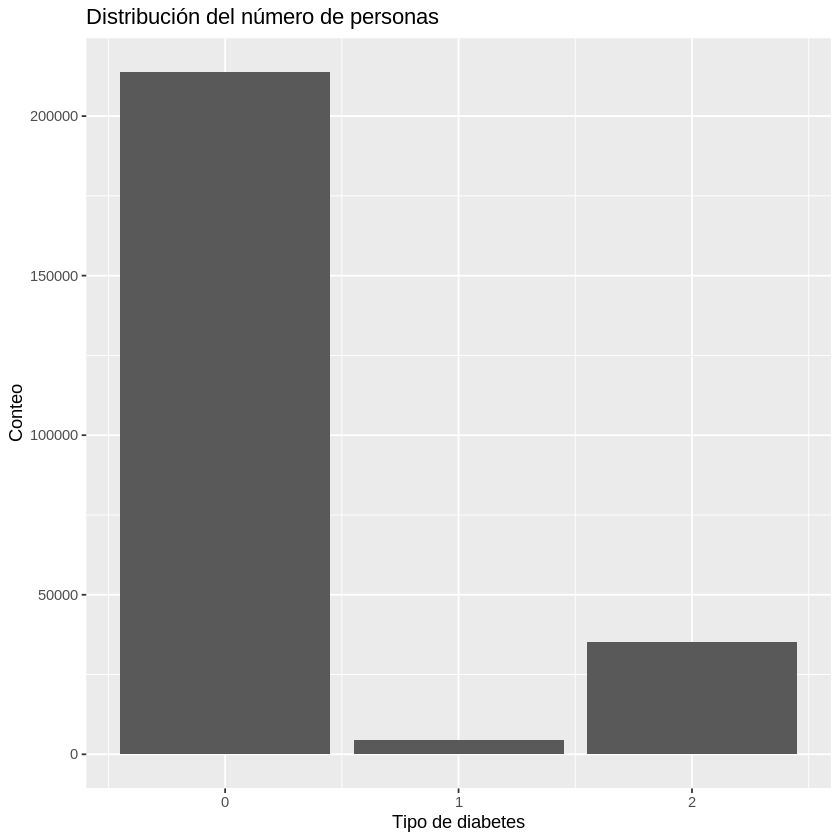

In [ ]:
grafica + xlab("Tipo de diabetes") + ylab("Conteo")+
  ggtitle("Distribución del número de personas")

In [ ]:
grafica = ggplot(tablaDiabetes, aes(x=Diabetes_012, y=Conteo))+
  geom_bar(stat="identity")
grafica 

### Para mayores opciones de barras
[Leer estos ejemplos](https://rpubs.com/hllinas/R_Barras_ggplot_univariada)

##  Histograma

En estadística, un histograma es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Sirven para obtener una "primera vista" general, o panorama, de la distribución de la población, o de la muestra, respecto a una característica, cuantitativa y continua (como la longitud o el peso). [Más](https://es.wikipedia.org/wiki/Histograma)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


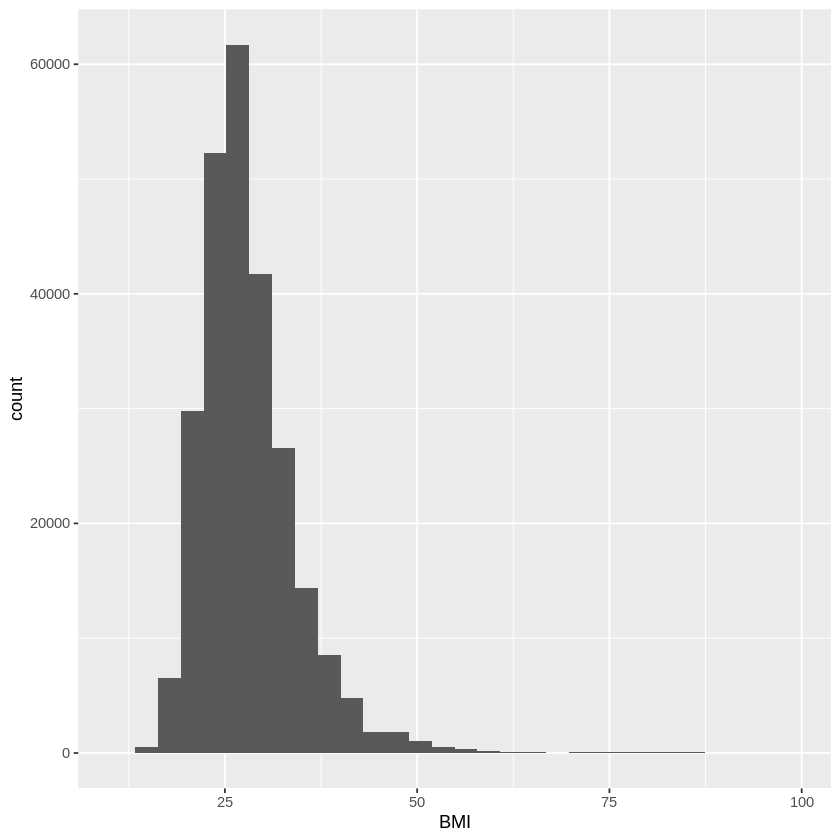

In [ ]:
grafica = ggplot(datos, aes(x=BMI))+geom_histogram()
grafica

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


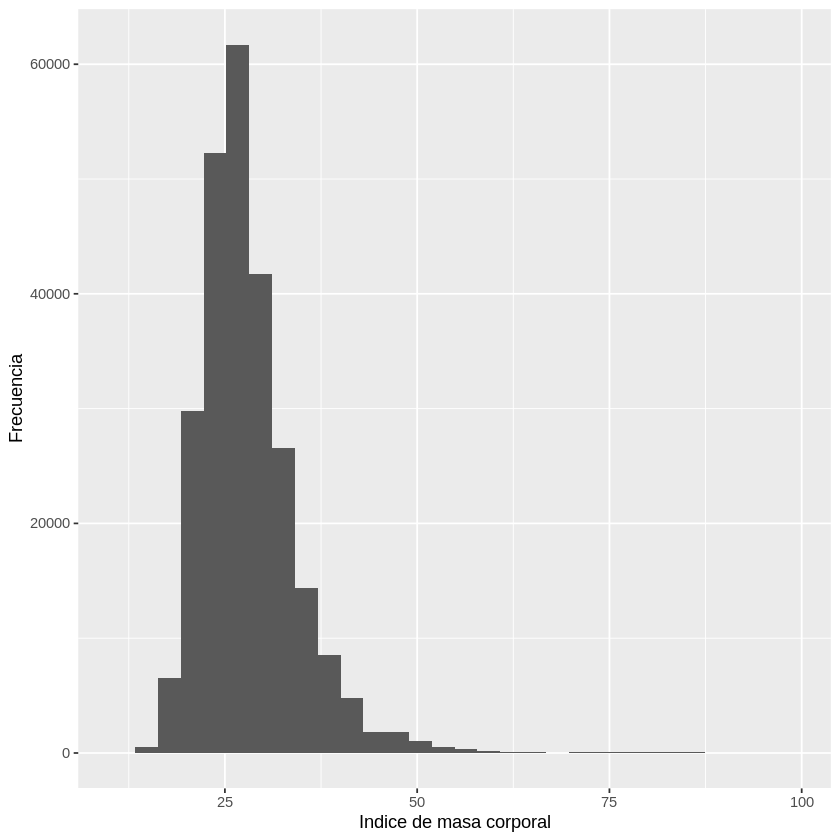

In [ ]:
grafica + xlab("Indice de masa corporal")+ylab("Frecuencia")

## Gráfico de caja
El Diagrama de Caja y bigotes (box and whisker plot en inglés ) es un tipo de gráfico que muestra un resumen de una gran cantidad de datos en cinco medidas descriptivas, además de intuir su morfología y simetría. Este tipo de gráficos nos permite identificar valores atípicos y comparar distribuciones. Además de conocer de una forma cómoda y rápida como el 50% de los valores centrales se distribuyen. [Más](https://www.pgconocimiento.com/diagrama-boxplot/)

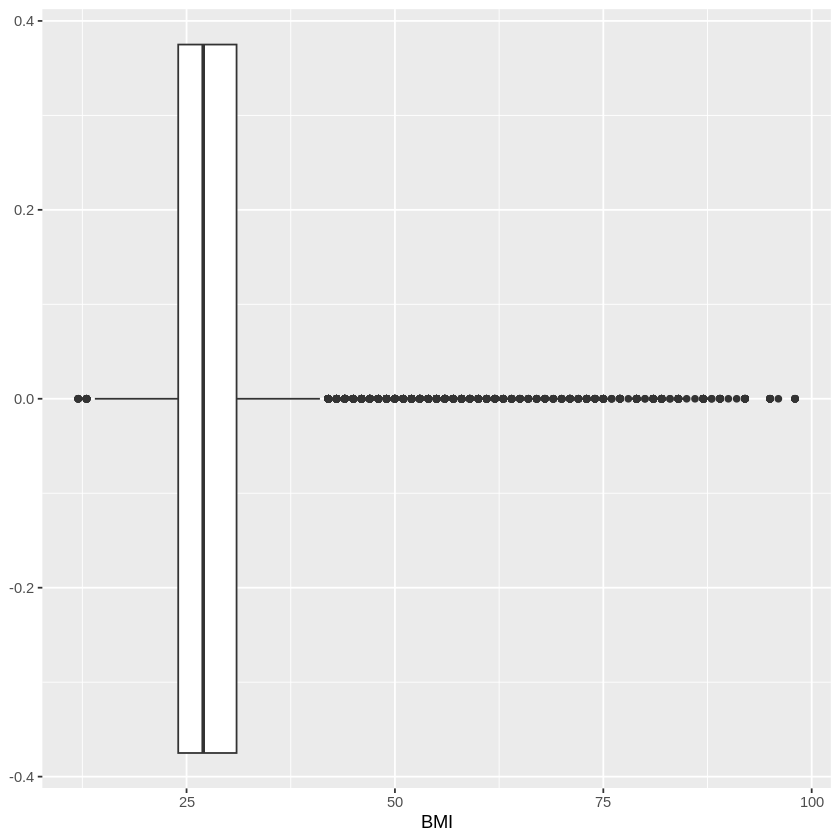

In [ ]:
grafica = ggplot(datos, aes(x=BMI))+geom_boxplot()
grafica

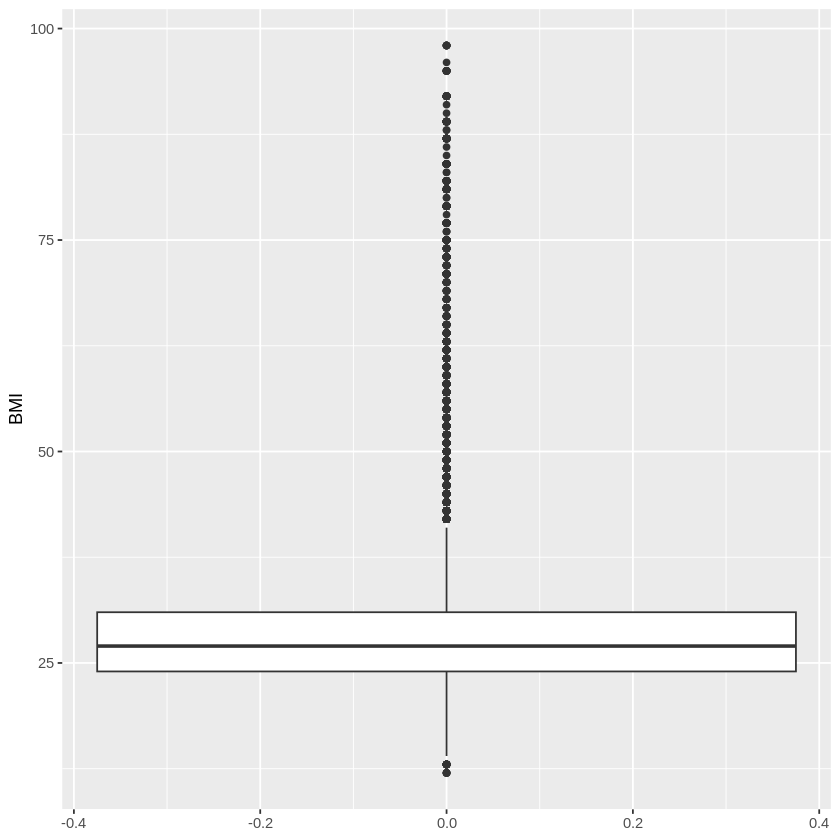

In [ ]:
grafica = ggplot(datos, aes(y=BMI))+geom_boxplot()
grafica

## Grafico de densidad

Un gráfico de densidad visualiza la distribución de datos cuantitativos en un intervalo o período de tiempo continuo. Este gráfico es una variación de un histograma que usa suavizado de kernel para trazar valores, lo que permite distribuciones más suaves suavizando el ruido.
Los picos de un gráfico de densidad ayudan a mostrar dónde se concentran los valores durante el intervalo.[Más](https://ridda2.utp.ac.pa/bitstream/handle/123456789/12645/tema-4-grafico-densidad-Area.html?sequence=16&isAllowed=y#:~:text=Un%20gr%C3%A1fico%20de%20densidad%20visualiza,m%C3%A1s%20suaves%20suavizando%20el%20ruido.)

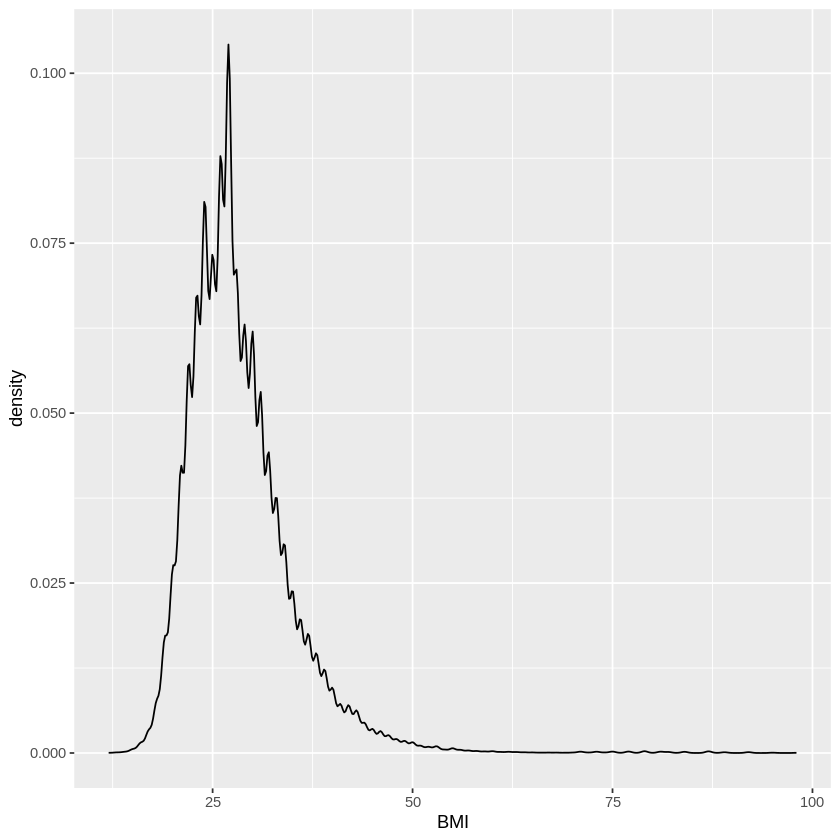

In [ ]:
grafica = ggplot(datos, aes(x=BMI))+geom_density()
grafica

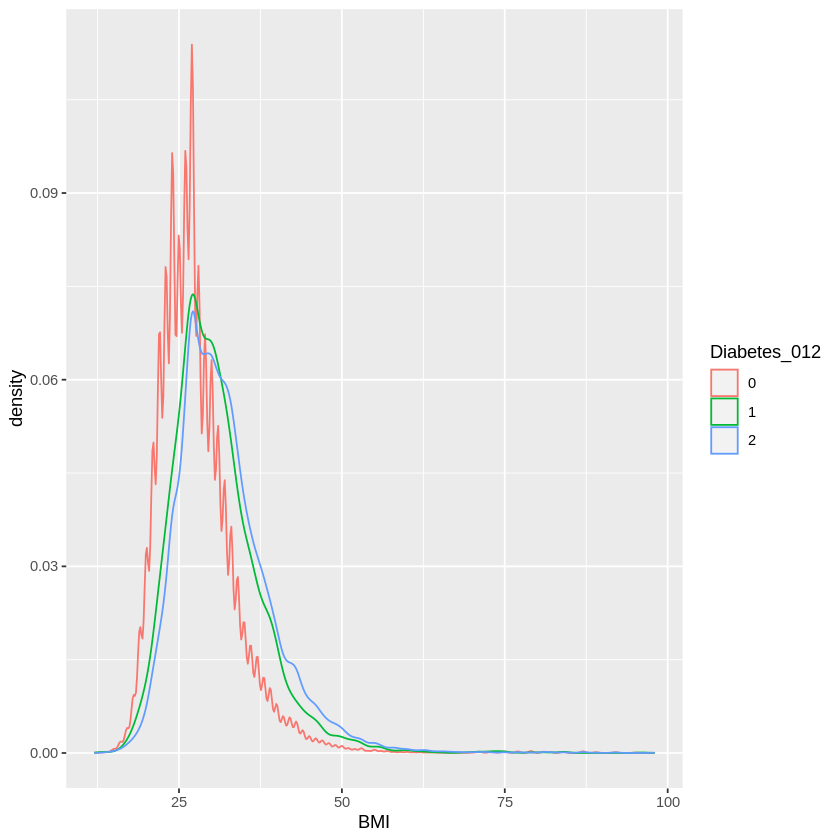

In [ ]:
datos = datos %>% mutate(Diabetes_012=factor(Diabetes_012))
grafica = ggplot(datos, aes(x=BMI, color=Diabetes_012))+geom_density()
grafica

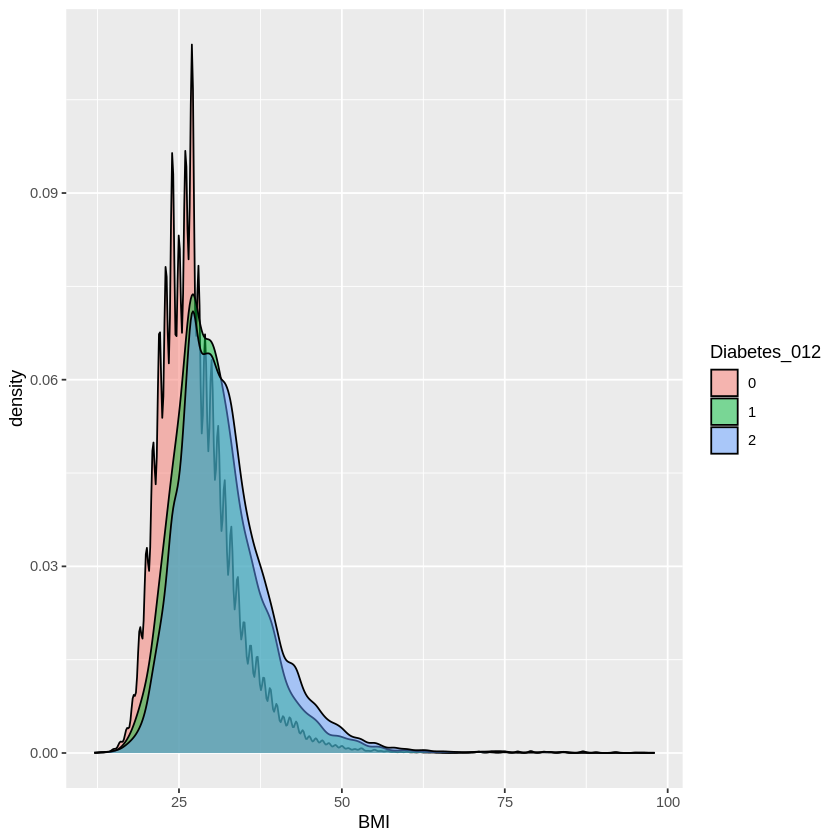

In [ ]:
datos = datos %>% mutate(Diabetes_012=factor(Diabetes_012))
grafica = ggplot(datos, aes(x=BMI, fill=Diabetes_012))+geom_density(alpha=0.5)
grafica

## Medidas de tendencia central y de dispersión

Las medidas de tendencia central son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores. Representan un centro en torno al cual se encuentra ubicado el conjunto de los datos. Las medidas de tendencia central más utilizadas son: media, mediana y moda. Las medidas de dispersión en cambio miden el grado de dispersión de los valores de la variable. Dicho en otros términos las medidas de dispersión pretenden evaluar en qué medida los datos difieren entre sí. De esta forma, ambos tipos de medidas usadas en conjunto permiten describir un conjunto de datos entregando información acerca de su posición y su dispersión.

1. Media
$$\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i$$
2. Mediana
3. Moda
4. Percentiles
5. Varianza
$$S^2_X=\frac{1}{n-1}\sum_{i=1}^n (x_i-\bar{x})$$
6. Desviación estándar
$$S_X=\sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i-\bar{x})}$$
7. Rango intercuartílico
$$P_{75}-P_{25}$$

In [ ]:
datos %>% select(BMI, Age) %>% summary()

      BMI             Age        
 Min.   :12.00   Min.   : 1.000  
 1st Qu.:24.00   1st Qu.: 6.000  
 Median :27.00   Median : 8.000  
 Mean   :28.38   Mean   : 8.032  
 3rd Qu.:31.00   3rd Qu.:10.000  
 Max.   :98.00   Max.   :13.000  

# Tareas

1. Hacer la tabla de frecuencias de una variable ordinal y una nominal.

2. Hacer un gráfico de boxplot del índice de masa corporal, pero solo para mujeres.

3. Hacer un gráfico de boxplot del índice de masa corporal, pero solo para hombres.

Con la siguiente categorización del IMC

IMC- Nivel de peso

Menor a 18.5 -Bajo peso

18.5 – 24.9	Normal

25.0 – 29.9	Sobrepeso

30.0 o más	Obesidad

4. Construir un grafico de barras de la variable IMC pero categorizada

5. Leer sobre la paradoja de [Simpson](https://magnet.xataka.com/en-diez-minutos/que-paradoja-simpson-que-va-a-ser-muy-util-para-entender-proximos-meses-pandemia)